# Map - USA Map & Houston

In [1]:
message = 'TT'
print('%s is so cool' % message)

TT is so cool


In [ ]:
class want_to_test():
    def __int__(self, )

In [12]:
import matplotlib
import numpy
import dateutil
import pytz
import pyparsing
import six
import matplotlib.pyplot as plt
import csv
import pygal

In [13]:
"""
Week 1 practice project template for Python Data Visualization
Load a county-level PNG map of the USA and draw it using matplotlib
"""

# Houston location

USA_SVG_SIZE = [555, 352]


def draw_USA_map(map_name):
    """
    Given the name of a PNG map of the USA (specified as a string),
    draw this map using matplotlib
    """
    # Load map image, note that using 'rb'option in open() is critical since png files are binary
    image = plt.imread(map_name)

    #  Get dimensions of USA map image
    ypixels, xpixels, bands = image.shape
    print(xpixels, ypixels, bands)
    
    # Plot USA map
    plt.imshow(image)
    # Plot green scatter point in center of map
    plt.scatter(x = xpixels / 2, y = ypixels / 2, s = 100, c = "Green")
     
    # Plot red scatter point on Houston, Tx - include code that rescale coordinates for larger PNG files
    USA_SVG_SIZE = [555, 352]
    HOUSTON_POS = [302, 280]
    plt.scatter(x = HOUSTON_POS[0] * xpixels / USA_SVG_SIZE[0], y = HOUSTON_POS[1] * ypixels / USA_SVG_SIZE[1], s = 100, c = "Red") 

    pass



555 352 4


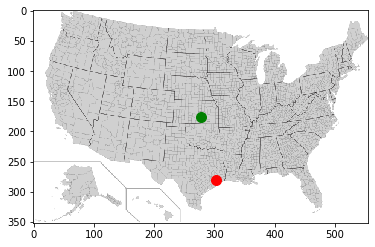

In [14]:
draw_USA_map("USA_Counties_555x352.png")
#draw_USA_map("USA_Counties_1000x634.png") 

In [ ]:
"""
Week 1 practice project solution for Python Data Visualization
Load a county-level PNG map of the USA and draw it using matplotlib
"""

import matplotlib.pyplot as plt

# Houston location

USA_SVG_SIZE = [555, 352]
HOUSTON_POS = [302, 280]


def draw_USA_map(map_name):
    """
    Given the name of a PNG map of the USA (specified as a string),
    draw this map using matplotlib
    """
     
    # Load map image, note that using 'rb'option in open() is critical since png files are binary
    with open(map_name, 'rb') as map_file:        # using 'r' causes Python to crash :(
        map_img = plt.imread(map_file)

    #  Get dimensions of USA map image
    ypixels, xpixels, bands = map_img.shape
    print(xpixels, ypixels, bands)
    
    # Optional code to resize plot as fixed size figure -
##    DPI = 80.0                  # adjust this constant to resize your plot
##    xinch = xpixels / DPI
##    yinch = ypixels / DPI
##    plt.figure(figsize=(xinch,yinch))
    
    # Plot USA map
    implot = plt.imshow(map_img)
    
    # Plot green scatter point in center of map
    plt.scatter(x = xpixels / 2, y = ypixels / 2, s = 100, c = "Green")
    
    # Plot red scatter point on Houston, Tx - include code that rescale coordinates for larger PNG files
    plt.scatter(x = HOUSTON_POS[0] * xpixels / USA_SVG_SIZE[0], y = HOUSTON_POS[1] * ypixels / USA_SVG_SIZE[1], s = 100, c = "Red") 

    plt.show()

draw_USA_map("USA_Counties_555x352.png")
#draw_USA_map("USA_Counties_1000x634.png") 

# Parse the XML in the given SVG file

In [35]:
"""
Week 2 practice project template for Python Data Visualization
Compute county centers from an SVG image of USA that includes county boundaries
Output a CSV file with FIPS code and county centers
"""

import math
import csv



# Parse the XMLin USA SVG file extract county attributes
# Derive from example code - https://stackoverflow.com/questions/15857818/python-svg-parser

from xml.dom import minidom

def get_county_attributes(svg_file_name):
    """
    Given SVG file associate with string svg_file_name, extract county attributes from associated XML
    Return a list of tuples consisting of FIPS codes (strings) and county boundaries (strings)
    """
    
    doc = minidom.parse(svg_file_name)  # parseString also exists
    tuple_list = [(path.getAttribute('id'),path.getAttribute('d')) for path
                in doc.getElementsByTagName('path')]
    doc.unlink()
    
    return tuple_list
                                          

def test_get_attributes(svg_file_name):
    """
    """
    county_attribute_list = get_county_attributes(svg_file_name)
    print(len(county_attribute_list))
    print(county_attribute_list[30])
    print()
    print(county_attribute_list[100])
    print()
    print(county_attribute_list[1000])
    
#test_get_attributes("USA_Counties_with_FIPS_and_names.svg")

# Output from tests
##3143
##('01045', 'M 405.63598,251.83 L 409.24698,251.415 L 409.67498,255.323 L 409.71998,255.692 L 409.02198,256.291 L 408.85498,256.306 L 408.35898,256.26 L 408.07398,256.183 L 407.69998,256.094 L 407.52498,256.085 L 407.33998,256.094 L 407.08298,256.179 L 407.02098,256.233 L 406.63198,257.211 L 405.74898,257.292 L 405.19098,251.879 L 405.63598,251.83')
##
##('05071', 'M 317.43698,203.82 L 319.27598,203.843 L 322.97698,204.189 L 322.99398,205.892 L 322.45798,206.989 L 321.89498,207.583 L 321.70498,207.588 L 321.72898,209.44 L 319.85398,208.364 L 319.41098,208.539 L 318.61698,208.792 L 317.41498,208.931 L 317.43698,203.82')
##
##('21119', 'M 425.90398,172.667 L 426.90998,172.816 L 427.64998,173.226 L 427.74298,173.371 L 427.79298,173.794 L 427.77098,174.145 L 427.95498,174.685 L 428.00898,174.74 L 428.23498,174.871 L 428.42898,174.957 L 428.23098,175.164 L 427.55398,175.394 L 426.85598,175.88 L 426.66598,176.124 L 426.46398,176.327 L 426.06698,176.642 L 425.84798,176.639 L 425.66498,176.512 L 424.04398,173.987 L 425.64298,172.487 L 425.90398,172.667')    



# Code to compute the center of a county from its boundary (as a string)

def get_boundary_coordinates(boundary_data):
    """
    Given the country boundary data as a string,
    Return the county boundary as a list of coordinates
    Ignores 'M', 'L, 'z'
    """
    
    boundary_data = boundary_data.replace('z', '')
    boundary_data = boundary_data.replace('M', 'L')
    boundary_list = boundary_data.split('L')[1:]
    
    boundary_coordinates = []
    for entry in boundary_list:
        temp = entry.split(',')
        if len(temp) == 2:
            (xcoord, ycoord) = temp
        else:
            print(len(temp))
            print(temp)
        boundary_coordinates.append((float(xcoord), float(ycoord)))    
    
    return boundary_coordinates


# Provided code to estimate a county center from a list of coordinates on county boundary

def dist(pt1, pt2):
    """
    Compute Euclidean distance between two points
    """
    return math.sqrt((pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2)

def compute_county_center(boundary_coordinates):
    """
    Given a list of coordinates (tuples of two floats) on the county boundary,
    Return an estimate of the center of the county as a tuple of two floats
    Assumes the list of coordinates forms a closed polygon with first and last point repeated
    """
    centroid = [0, 0]
    perimeter = 0
    for idx in range(len(boundary_coordinates) - 1):
        edge_length = dist(boundary_coordinates[idx], boundary_coordinates[idx + 1])
        centroid[0] += 0.5 * (boundary_coordinates[idx][0] + boundary_coordinates[idx + 1][0]) * edge_length
        centroid[1] += 0.5 * (boundary_coordinates[idx][1] + boundary_coordinates[idx + 1][1]) * edge_length
        perimeter += edge_length
    return [(centroid[0] / perimeter), (centroid[1] / perimeter)]


BOUNDARY_STRING1 = "M 412.47298,198.204 L 412.05498,198.597 L 411.68998,198.637 L 410.44998,197.371 L 409.73798,196.51 L 410.65298,195.31 L 412.14998,194.265 L 412.94598,194.016 L 413.28898,193.711 L 413.91998,193.075 L 414.86198,194.775 L 414.97098,194.936 L 414.77698,194.878 L 414.28998,195.071 L 412.64998,197.641 L 412.47298,198.204 z M 412.47298,198.204 L 412.47298,198.204"
BOUNDARY_STRING2 = "M 124.80274,305.35735 L 123.03975,304.03435 L 123.48174,303.37435 L 124.36175,303.59335 L 125.02275,304.03435 L 125.46275,305.13535 L 124.80274,305.35735 M 125.90375,309.76335 L 126.12375,309.98335 L 125.02275,310.64335 L 124.58274,309.32235 L 123.92075,308.66035 L 123.92075,309.10235 L 123.70075,309.10235 L 121.71875,308.66035 L 121.71875,308.88135 L 122.59975,308.88135 L 123.92075,309.32235 L 124.80274,310.64335 L 123.48174,311.96535 L 122.59975,311.52535 L 122.15875,311.52535 L 121.49775,311.30535 L 119.29575,310.42235 L 120.17675,309.54235 L 121.49775,307.55935 L 122.15875,307.33935 L 122.15875,306.89835 L 124.14175,306.89835 L 125.02275,307.55935 L 124.80274,308.66035 L 125.90375,308.88135 L 126.34474,309.32235 L 125.90375,309.76335 M 134.27575,313.50735 L 133.61475,313.50735 L 133.39675,313.94835 L 133.17575,312.84635 L 132.07475,311.74535 L 132.07475,311.30535 L 131.85275,310.64335 L 131.85275,310.42235 L 132.29375,308.88135 L 135.81775,311.74535 L 134.93875,311.96535 L 134.49675,312.62535 L 134.27575,313.50735 M 129.20874,310.42235 L 129.86974,309.98335 L 129.86974,310.20135 L 131.63375,311.96535 L 131.19175,311.96535 L 130.53075,311.08435 L 130.31075,311.30535 L 131.85275,312.84635 L 132.07475,313.28835 L 131.63375,313.94835 L 131.63375,314.60935 L 130.97074,315.70935 L 130.31075,314.83035 L 130.31075,313.50735 L 129.20874,312.62535 L 128.32674,310.86435 L 127.44574,309.76335 L 127.44574,309.54235 L 127.66674,309.54235 L 128.32674,310.20135 L 128.54674,310.86435 L 128.98874,310.86435 L 128.98874,310.64335 L 129.20874,310.42235 M 126.78574,312.62535 L 125.90375,312.40635 L 125.90375,313.28835 L 125.02275,313.50735 L 124.36175,313.28835 L 124.14175,312.62535 L 124.36175,311.52535 L 125.24275,311.30535 L 125.68474,310.86435 L 128.10674,311.30535 L 128.32674,311.74535 L 128.54674,312.40635 L 128.32674,312.62535 L 127.88674,312.84635 L 126.78574,312.62535"

def test_boundary_code():
    """
    Test out code for computing coordinates for county boundaries
    """
    boundary_coords1 = get_boundary_coordinates(BOUNDARY_STRING1)
    boundary_coords2 = get_boundary_coordinates(BOUNDARY_STRING2)
    print(boundary_coords1)
    print(boundary_coords2)
    print(compute_county_center(boundary_coords1))
    print(compute_county_center(boundary_coords2))

#test_boundary_code()

# Output for testing code
##[(412.47298, 198.204), (412.05498, 198.597), (411.68998, 198.637), (410.44998, 197.371), (409.73798, 196.51), (410.65298, 195.31), (412.14998, 194.265), (412.94598, 194.016), (413.28898, 193.711), (413.91998, 193.075), (414.86198, 194.775), (414.97098, 194.936), (414.77698, 194.878), (414.28998, 195.071), (412.64998, 197.641), (412.47298, 198.204), (412.47298, 198.204), (412.47298, 198.204)]
##[(124.80274, 305.35735), (123.03975, 304.03435), (123.48174, 303.37435), (124.36175, 303.59335), (125.02275, 304.03435), (125.46275, 305.13535), (124.80274, 305.35735), (125.90375, 309.76335), (126.12375, 309.98335), (125.02275, 310.64335), (124.58274, 309.32235), (123.92075, 308.66035), (123.92075, 309.10235), (123.70075, 309.10235), (121.71875, 308.66035), (121.71875, 308.88135), (122.59975, 308.88135), (123.92075, 309.32235), (124.80274, 310.64335), (123.48174, 311.96535), (122.59975, 311.52535), (122.15875, 311.52535), (121.49775, 311.30535), (119.29575, 310.42235), (120.17675, 309.54235), (121.49775, 307.55935), (122.15875, 307.33935), (122.15875, 306.89835), (124.14175, 306.89835), (125.02275, 307.55935), (124.80274, 308.66035), (125.90375, 308.88135), (126.34474, 309.32235), (125.90375, 309.76335), (134.27575, 313.50735), (133.61475, 313.50735), (133.39675, 313.94835), (133.17575, 312.84635), (132.07475, 311.74535), (132.07475, 311.30535), (131.85275, 310.64335), (131.85275, 310.42235), (132.29375, 308.88135), (135.81775, 311.74535), (134.93875, 311.96535), (134.49675, 312.62535), (134.27575, 313.50735), (129.20874, 310.42235), (129.86974, 309.98335), (129.86974, 310.20135), (131.63375, 311.96535), (131.19175, 311.96535), (130.53075, 311.08435), (130.31075, 311.30535), (131.85275, 312.84635), (132.07475, 313.28835), (131.63375, 313.94835), (131.63375, 314.60935), (130.97074, 315.70935), (130.31075, 314.83035), (130.31075, 313.50735), (129.20874, 312.62535), (128.32674, 310.86435), (127.44574, 309.76335), (127.44574, 309.54235), (127.66674, 309.54235), (128.32674, 310.20135), (128.54674, 310.86435), (128.98874, 310.86435), (128.98874, 310.64335), (129.20874, 310.42235), (126.78574, 312.62535), (125.90375, 312.40635), (125.90375, 313.28835), (125.02275, 313.50735), (124.36175, 313.28835), (124.14175, 312.62535), (124.36175, 311.52535), (125.24275, 311.30535), (125.68474, 310.86435), (128.10674, 311.30535), (128.32674, 311.74535), (128.54674, 312.40635), (128.32674, 312.62535), (127.88674, 312.84635), (126.78574, 312.62535)]
##[412.4322758720973, 195.8063763549288]
##[127.67295507021686, 310.5353674642897]

                                            
# Put it all together to read county attributes from SVG files, compute county centers, write FIPS codes and county centers to CSV file

def process_county_attributes(svg_file_name, csv_file_name):
    """
    Given SVG file name (as string), extract county attributes (FIPS code and county boundaries)
    Then compute county centers and write a CSV file with columns corresponding to FIPS code, x-coord of centers, y-coord of centers 
    """

    # Extract county attibutes from SVG file
    county_attribute_list = get_county_attributes(svg_file_name)
    print("Processed", len(county_attribute_list), "entries")
    
    # Ouput CSV file
    with open(csv_file_name, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file, delimiter=',', quoting=csv.QUOTE_MINIMAL)
        for (fips, boundary) in county_attribute_list:
            boundary_coordinates = get_boundary_coordinates(boundary)
            center = compute_county_center(boundary_coordinates)
            csv_writer.writerow([fips, center[0], center[1]])
    print("Wrote csv file", csv_file_name)
    
    
# Output CSV file should have 3143 rows
    
process_county_attributes("USA_Counties_2014.svg", "USA_Counties_with_FIPS_and_centers.csv")    

Processed 3143 entries
Wrote csv file USA_Counties_with_FIPS_and_centers.csv


In [36]:
# test
# tuple_list[1][1].replace('M', 'L').split('L')[1:][0].split(',')

# Practice Project: Reconciling Cancer-Risk Data with the USA Map

In [37]:
"""
Week 3 practice project template for Python Data Visualization
Read two CSV files and join the resulting tables based on shared FIPS codes
Analyze both data sources for anamolous FIPS codes
"""

import csv



#########################################################
# Provided code for week 3

def print_table(table):
    """
    Echo a nested list to the console
    """
    for row in table:
        print(row)


def read_csv_file(file_name):
    """
    Given a CSV file, read the data into a nested list
    Input: String corresponding to comma-separated  CSV file
    Output: Nested list consisting of the fields in the CSV file
    """
       
    with open(file_name, newline='') as csv_file:       # don't need to explicitly close the file now
        csv_table = []
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            csv_table.append(row)
    return csv_table



def write_csv_file(csv_table, file_name):
    """
    Input: Nested list csv_table and a string file_name
    Action: Write fields in csv_table into a comma-separated CSV file with the name file_name
    """
    
    with open(file_name, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file, delimiter=',', quoting=csv.QUOTE_MINIMAL)
        for row in csv_table:
            csv_writer.writerow(row)



# Part 1 - function that creates a dictionary from a table

def make_dict(table, key_col):
    """
    Given a 2D table (list of lists) and a column index key_col,
    return a dictionary whose keys are entries of specified column
    and whose values are lists consisting of the remaining row entries
    """
    
    answer_dict = {}
    for row in table:
        key = row[key_col]
        copy_row = list(row)   # avoid mutating table
        copy_row.pop(key_col)
        answer_dict[key] = copy_row
    return answer_dict




def test_make_dict():
    """
    Some tests for make_dict()
    """
    table1 = [[1, 2], [3, 4], [5, 6]]
    print(make_dict(table1, 0))
    print(make_dict(table1, 1))
    table2 = [[1, 2, 3], [2, 4, 6], [3, 6, 9]]
    print(make_dict(table2, 1))
    print(make_dict(table2, 2))
    
#test_make_dict()



# Part 2 - script for merging the CSV files

CANCER_RISK_FIPS_COL = 2
CENTER_FIPS_COL = 0

def merge_csv_files(cancer_csv_file, center_csv_file, joined_csv_file):
    """
    Read two specified CSV files as tables
    Join the these tables by shared FIPS codes
    Write the resulting joined table as the specified file
    Analyze for problematic FIPS codes
    """
    
   # Read in both CSV files
    risk_table = read_csv_file(cancer_csv_file)
    print("Read risk table of length", len(risk_table))
    
    center_table = read_csv_file(center_csv_file)
    print("Read center table of length", len(center_table))

    center_dict = make_dict(center_table, CENTER_FIPS_COL)
    
    # Compute joined table, print warning about cancer-risk FIPS codes that are not in USA map
    joined_table =[]
    for row in risk_table:
        FIPS_code = row[2]
        if FIPS_code in center_dict:
            joined_table.append(row + center_dict[FIPS_code])
        else:
            print("Row", row, "in cancer risk table not present in USA map")

    # Write joined table
    print("Wrote joined table of length", len(joined_table))
    write_csv_file(joined_table, joined_csv_file)
    
    # Print warning about FIPS codes in USA map that are missing from cancer risk data
    print()
    risk_codes =[risk_table[idx][2] for idx in range(len(risk_table))]
    for center_code in center_dict:
        if center_code not in risk_codes:
            print("Code", center_code, "in center table not present in cancer risk table")



merge_csv_files("cancer_risk_trimmed_solution.csv", "USA_Counties_with_FIPS_and_centers.csv", "cancer_risk_joined.csv")




## Part 3 - Explanation for anomalous FIPS codes

## https://www1.udel.edu/johnmack/frec682/fips_codes.html
##
## Output anamolies for cancer risk data
## Puerto Rico, Virgin Island, Statewide, Nationwide - FIPS codes are all not present on USA map
## One specific county (Clifton Forge, VA - 51560) is also not present in USA map.
## According URL above, Clifton Forge was merged with another VA county prior to 2001
##
## Output anamolies for USA map
## State_Line, separator - FIPS codes are all not present in cancer-risk data
## One specific county (Broomfield County - 08014) is also not present in cancer-risk data
## Accoring to URL above, Broomfield County was created in 2001
##
## Implies cancer risk FIPS codes were defined prior to 2001, the USA map FIPS codes were defined after 2001

Read risk table of length 3276
Read center table of length 3143
Row ['CA', 'Statewide', '06000', '33871648', '7.7E-05'] in cancer risk table not present in USA map
Row ['DC', 'Statewide', '11000', '572059', '7.7E-05'] in cancer risk table not present in USA map
Row ['NY', 'Statewide', '36000', '18976457', '7.2E-05'] in cancer risk table not present in USA map
Row ['MD', 'Statewide', '24000', '5296486', '5.7E-05'] in cancer risk table not present in USA map
Row ['NJ', 'Statewide', '34000', '8414350', '5.6E-05'] in cancer risk table not present in USA map
Row ['AZ', 'Statewide', '04000', '5130632', '5.5E-05'] in cancer risk table not present in USA map
Row ['OR', 'Statewide', '41000', '3421399', '5.5E-05'] in cancer risk table not present in USA map
Row ['CT', 'Statewide', '09000', '3405565', '5.3E-05'] in cancer risk table not present in USA map
Row ['GA', 'Statewide', '13000', '8186453', '5.3E-05'] in cancer risk table not present in USA map
Row ['US', 'Nationwide', '-', '285339128', '

Code State_Lines in center table not present in cancer risk table
Code separator in center table not present in cancer risk table


# Pygal Line Chart - Country GDP by Years

In [2]:
!pip install pygal

In [10]:
nested_dict = {}

with open("isp_gdp.csv", 'rt', newline='') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=",",
                                quotechar='"')
    for row in csv_reader:
        print(row['Country Name'])
#         rowid = row[0]
#         nested_dict[rowid] = row

Aruba
Andorra
Afghanistan
Angola
Albania
Arab World
United Arab Emirates
Argentina
Armenia
American Samoa
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Burkina Faso
Bangladesh
Bulgaria
Bahrain
Bahamas, The
Bosnia and Herzegovina
Belarus
Belize
Bermuda
Bolivia
Brazil
Barbados
Brunei Darussalam
Bhutan
Botswana
Central African Republic
Canada
Central Europe and the Baltics
Switzerland
Channel Islands
Chile
China
Cote d'Ivoire
Cameroon
Congo, Rep.
Colombia
Comoros
Cabo Verde
Costa Rica
Caribbean small states
Cuba
Curacao
Cayman Islands
Cyprus
Czech Republic
Germany
Djibouti
Dominica
Denmark
Dominican Republic
Algeria
East Asia & Pacific (excluding high income)
Early-demographic dividend
East Asia & Pacific
Europe & Central Asia (excluding high income)
Europe & Central Asia
Ecuador
Egypt, Arab Rep.
Euro area
Eritrea
Spain
Estonia
Ethiopia
European Union
Fragile and conflict affected situations
Finland
Fiji
France
Faroe Islands
Micronesia, Fed. Sts.
Gabon
United King

In [76]:
"""
Project for Week 2 of "Python Data Visualization".
Read World Bank GDP data and create some basic XY plots.

Be sure to read the project description page for further information
about the expected behavior of the program.
"""

import csv
import pygal

gdpinfo = {
        "gdpfile": "isp_gdp.csv",        # Name of the GDP CSV file
        "separator": ",",                # Separator character in CSV file
        "quote": '"',                    # Quote character in CSV file
        "min_year": 1960,                # Oldest year of GDP data in CSV file
        "max_year": 2015,                # Latest year of GDP data in CSV file
        "country_name": "Country Name",  # Country name field name
        "country_code": "Country Code"   # Country code field name
    }

def read_csv_as_nested_dict(filename, keyfield, separator, quote):
    """
    Inputs:
      filename  - Name of CSV file
      keyfield  - Field to use as key for rows
      separator - Character that separates fields
      quote     - Character used to optionally quote fields

    Output:
      Returns a dictionary of dictionaries where the outer dictionary
      maps the value in the key_field to the corresponding row in the
      CSV file.  The inner dictionaries map the field names to the
      field values for that row.
    """
    nested_dict = {}

    with open(filename, 'rt', newline='') as csv_file:
        csv_reader = csv.DictReader(csv_file, delimiter=separator,
                                    quotechar=quote)
        for row in csv_reader:
            # print(row)
            rowid = row[keyfield]
            nested_dict[rowid] = row
            
    return nested_dict


def build_plot_values(gdpinfo, gdpdata):
    """
    Inputs:
      gdpinfo - GDP data information dictionary
      gdpdata - A single country's GDP stored in a dictionary whose
                keys are strings indicating a year and whose values
                are strings indicating the country's corresponding GDP
                for that year.

    Output: 
      Returns a list of tuples of the form (year, GDP) for the years
      between "min_year" and "max_year", inclusive, from gdpinfo that
      exist in gdpdata.  The year will be an integer and the GDP will
      be a float.
    """
    
    list_tuple = []
    data_dict = {}
    
    for k, v in gdpdata.items():
        try:
            data_dict[int(k)] = float(v)
        except ValueError:
            pass

    years = [year for year in range(gdpinfo['min_year'], gdpinfo['max_year'] + 1)]

    for key in years:
        if key in data_dict.keys():
            list_tuple.append((key, data_dict[key]))
    
    return list_tuple


def build_plot_dict(gdpinfo, country_list):
    """
    Inputs:
      gdpinfo      - GDP data information dictionary
      country_list - List of strings that are country names

    Output:
      Returns a dictionary whose keys are the country names in
      country_list and whose values are lists of XY plot values 
      computed from the CSV file described by gdpinfo.

      Countries from country_list that do not appear in the
      CSV file should still be in the output dictionary, but
      with an empty XY plot value list.
    """
    
    dict_country = {}
    
    nested_dict = read_csv_as_nested_dict(gdpinfo["gdpfile"], 'Country Name', gdpinfo["separator"], gdpinfo["quote"])
    
    for c in country_list:
        if c in nested_dict.keys():
            dict_country[c] = build_plot_values(gdpinfo, nested_dict[c])
        else:
            dict_country[c] = []
    
    return dict_country


def render_xy_plot(gdpinfo, country_list, plot_file):
    """
    Inputs:
      gdpinfo      - GDP data information dictionary
      country_list - List of strings that are country names
      plot_file    - String that is the output plot file name

    Output:
      Returns None.

    Action:
      Creates an SVG image of an XY plot for the GDP data
      specified by gdpinfo for the countries in country_list.
      The image will be stored in a file named by plot_file.
    """
    
#     line_chart = pygal.Line()
#     line_chart.title = 'Browser usage evolution (in %)'
#     line_chart.x_labels = map(str, range(2002, 2013))
#     line_chart.add('Firefox', [None, None,    0, 16.6,   25,   31, 36.4, 45.5, 46.3, 42.8, 37.1])
#     line_chart.add('Chrome',  [None, None, None, None, None, None,    0,  3.9, 10.8, 23.8, 35.3])
#     line_chart.add('IE',      [85.8, 84.6, 84.7, 74.5,   66, 58.6, 54.7, 44.8, 36.2, 26.6, 20.1])
#     line_chart.add('Others',  [14.2, 15.4, 15.3,  8.9,    9, 10.4,  8.9,  5.8,  6.7,  6.8,  7.5])
#     line_chart.render()
    
    xy_chart = pygal.XY()
    xy_chart.title = 'Country GDP by Years'
    
    dict_country = build_plot_dict(gdpinfo, country_list)
    
    for c in country_list:
        xy_chart.add(c, dict_country[c])
    
    xy_chart.render_to_file(plot_file)

    return


def test_render_xy_plot():
    """
    Code to exercise render_xy_plot and generate plots from
    actual GDP data.
    """
    gdpinfo = {
        "gdpfile": "isp_gdp.csv",
        "separator": ",",
        "quote": '"',
        "min_year": 1960,
        "max_year": 2015,
        "country_name": "Country Name",
        "country_code": "Country Code"
    }

    render_xy_plot(gdpinfo, [], "isp_gdp_xy_none.svg")
    render_xy_plot(gdpinfo, ["China"], "isp_gdp_xy_china.svg")
    render_xy_plot(gdpinfo, ["United Kingdom", "United States"],
                   "isp_gdp_xy_uk+usa.svg")
    render_xy_plot(gdpinfo, ["United Kingdom", "United States","China"],
                   "isp_gdp_xy_uk+usa+china.svg")


# Make sure the following call to test_render_xy_plot is commented out
# when submitting to OwlTest/CourseraTest.

test_render_xy_plot()

In [15]:
!pip install svglib

  Created wheel for svglib: filename=svglib-1.0.0-cp37-none-any.whl size=26848 sha256=899e70694c123bb5970a290696470938347c8fa27b4efe124c08518ae7fa3ada
  Stored in directory: C:\Users\iGuest\AppData\Local\pip\Cache\wheels\e5\8e\78\7c1c7a612f8a87139b1b087b68c2c941976c2f24e1c0259cbb
Successfully built svglib


In [39]:
# convert svg to png
from svglib.svglib import svg2rlg
import matplotlib.pyplot as plt
from reportlab.graphics import renderPDF, renderPM
drawing = svg2rlg("isp_gdp_xy_uk+usa.svg")
renderPM.drawToFile(drawing, "file.png", fmt="PNG")

Can't handle color: none !important
Can't handle color: none !important
Can't handle color: none !important
Can't handle color: none !important
Can't handle color: none !important
Can't handle color: none !important
Can't handle color: none !important
Can't handle color: none !important
Can't handle color: none !important
Can't handle color: none !important
Can't handle color: none !important
Can't handle color: none !important
Can't handle color: none !important
Can't handle color: none !important
Can't handle color: none !important
Can't handle color: none !important
Can't handle color: none !important


# Flow Chart

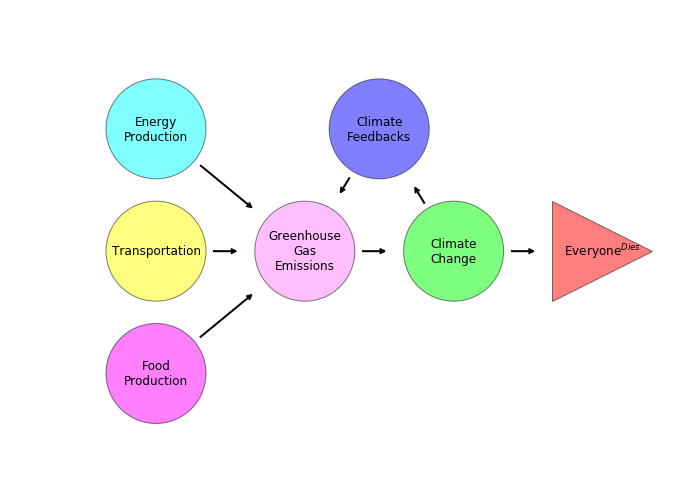

In [41]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize = (12,9))

From = ['Food\nProduction', 'Transportation', 'Energy\nProduction',
        "Greenhouse\nGas\nEmissions",'Climate\nChange','Climate\nFeedbacks','Greenhouse\nGas\nEmissions',
        'Climate\nChange']
To = ["Greenhouse\nGas\nEmissions", "Greenhouse\nGas\nEmissions",
      "Greenhouse\nGas\nEmissions",'Climate\nChange','Climate\nFeedbacks','Greenhouse\nGas\nEmissions',
      'Climate\nChange','Everyone$^{Dies}$']

df = pd.DataFrame({ 'from':From,
                   'to':To})
# Define Node Positions
pos = {'Food\nProduction':(1,1),
        'Transportation':(1,2),
        'Energy\nProduction':(1,3),
        'Greenhouse\nGas\nEmissions':(2,2),
        'Climate\nChange':(3,2),
        'Climate\nFeedbacks':(2.5,3),
        'Everyone$^{Dies}$':(4,2)}

# Define Node Colors
NodeColors = {'Food\nProduction':[1,0,1],
        'Transportation':[1,1,0],
        'Energy\nProduction':[0,1,1],
        'Greenhouse\nGas\nEmissions':[1,.5,1],
        'Climate\nChange':[0,1,0],
        'Climate\nFeedbacks':[0,0,1],
        'Everyone$^{Dies}$':[1,0,0]}

Labels = {}
i = 0
for a in From:
    Labels[a]=a
    i +=1
Labels[To[-1]]=To[-1]

# Build your graph. Note that we use the DiGraph function to create the graph! This adds arrows
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph() )

# Define the colormap and set nodes to circles, but the last one to a triangle
Circles = []
Traingle = []
ColorsC = []
ColorsT = []
for n in G.nodes:
    if n != 'Everyone$^{Dies}$':
        Circles.append(n)
        ColorsC.append(NodeColors[n])
    else:
        Traingle.append(n)
        ColorsT.append(NodeColors[n])
    #Colors.append(NodeColors[n])

# By making a white node that is larger, I can make the arrow "start" beyond the node
nodes = nx.draw_networkx_nodes(G, pos, 
                       nodelist = Circles,
                       node_size=1.25e4,
                       node_shape='o',
                       node_color='white',
                       alpha=1)

nodes = nx.draw_networkx_nodes(G, pos, 
                       nodelist = Circles,
                       node_size=1e4,
                       node_shape='o',
                       node_color=ColorsC,
                       edgecolors='black',
                       alpha=0.5)


nodes = nx.draw_networkx_nodes(G, pos, 
                       nodelist = Traingle,
                       node_size=1.25e4,
                       node_shape='>',
                       node_color='white',
                       alpha=1)

nodes = nx.draw_networkx_nodes(G, pos, 
                       nodelist = Traingle,
                       node_size=1e4,
                       node_shape='>',
                       node_color=ColorsT,
                       edgecolors='black',
                       alpha=0.5)


nx.draw_networkx_labels(G, pos, Labels, font_size=12)

# Again by making the node_size larer, I can have the arrows end before they actually hit the node
edges = nx.draw_networkx_edges(G, pos, node_size=1.8e4,
                               arrowstyle='->',width=2,arrowsizes=10)

plt.xlim(0,4.5)
plt.ylim(0,4)
plt.axis('off')
plt.show()

# Project: Plotting GDP Data on a World Map - Part 1

In [70]:
"""
Project for Week 3 of "Python Data Visualization".
Unify data via common country name.

Be sure to read the project description page for further information
about the expected behavior of the program.
"""

import csv
import math
import pygal

def reconcile_countries_by_name(plot_countries, gdp_countries):
    """
    Inputs:
      plot_countries - Dictionary whose keys are plot library country codes
                       and values are the corresponding country name
      gdp_countries  - Dictionary whose keys are country names used in GDP data

    Output:
      A tuple containing a dictionary and a set.  
      The dictionary maps
      country codes from plot_countries to country names from
      gdp_countries 
      The set contains the country codes from
      plot_countries that were not found in gdp_countries.
    """
    
    # Compute joined dictionaries, print warning about cancer-risk FIPS codes that are not in USA map
    joined_dict = {}
    set_table = []
    for k, v in plot_countries.items():
        if v in gdp_countries.keys():
            joined_dict[k] = v
        else:
            set_table.append(k)
    
    return joined_dict, set(set_table)


def build_map_dict_by_name(gdpinfo, plot_countries, year):
    """
    Inputs:
      gdpinfo        - A GDP information dictionary
      plot_countries - Dictionary whose keys are plot library country codes
                       and values are the corresponding country name
      year           - String year to create GDP mapping for

    Output:
      A tuple containing a dictionary and two sets.  
      The dictionary
      maps country codes from plot_countries to the log (base 10) of
      the GDP value for that country in the specified year.  
      The first
      set contains the country codes from plot_countries that were not
      found in the GDP data file.  
      The second set contains the country
      codes from plot_countries that were found in the GDP data file, but
      have no GDP data for the specified year.
    """
    
    nested_dict = read_csv_as_nested_dict(gdpinfo["gdpfile"], 'Country Name', gdpinfo["separator"], gdpinfo["quote"])
    code_name, tuple_set1 = reconcile_countries_by_name(plot_countries, nested_dict)
    
    tuple_dict = {}
    tuple_set2 = []
    for k, v in code_name.items():
        if nested_dict[v][year] == '0':
            nested_dict[v][year] == ''
        if nested_dict[v][year] == '':
            tuple_set2.append(k)
        else:
            tuple_dict[k] = math.log10(float(nested_dict[v][year]))
    
    return tuple_dict, tuple_set1, tuple_set2


def render_world_map(gdpinfo, plot_countries, year, map_file):
    """
    Inputs:
      gdpinfo        - A GDP information dictionary
      plot_countries - Dictionary whose keys are plot library country codes
                       and values are the corresponding country name
      year           - String year to create GDP mapping for
      map_file       - Name of output file to create

    Output:
      Returns None.

    Action:
      Creates a world map plot of the GDP data for the given year and
      writes it to a file named by map_file.
    """
    worldmap_chart = World()
    worldmap_chart.title = 'GDP by Country (Log Scale) for ' + year
    gdp_dict, missing_data, missing_data_year = build_map_dict_by_name(gdpinfo, plot_countries, year)
    worldmap_chart.add('GDP for '+year, gdp_dict)
    worldmap_chart.add('Missing '+year+' data', missing_data_year)
    worldmap_chart.add('No record', missing_data)
    worldmap_chart.render_to_file(map_file)


def test_render_world_map():
    """
    Test the project code for several years.
    """
    gdpinfo = {
        "gdpfile": "isp_gdp.csv",
        "separator": ",",
        "quote": '"',
        "min_year": 1960,
        "max_year": 2015,
        "country_name": "Country Name",
        "country_code": "Country Code"
    }

    # Get pygal country code map
    #pygal_countries = pygal.maps.world.COUNTRIES
    pygal_countries = pygal_maps_world.maps.COUNTRIES

    # 1960
    render_world_map(gdpinfo, pygal_countries, "1960", "isp_gdp_world_name_1960.svg")

    # 1980
    render_world_map(gdpinfo, pygal_countries, "1980", "isp_gdp_world_name_1980.svg")

    # 2000
    render_world_map(gdpinfo, pygal_countries, "2000", "isp_gdp_world_name_2000.svg")

    # 2010
    render_world_map(gdpinfo, pygal_countries, "2010", "isp_gdp_world_name_2010.svg")


# Make sure the following call to test_render_world_map is commented
# out when submitting to OwlTest/CourseraTest.

# test_render_world_map()

In [55]:
!pip install pygal_maps_world

In [71]:
test_render_world_map()


In [53]:
from pygal_maps_world.maps import World
from pygal_maps_world.maps import World

In [61]:
import pygal_maps_world.maps

In [79]:
html_file=open("merged.html",'w')
html_file.write("<html><head>…</head><body>"+"\n")

html_file.write("      <object type=\"image/svg+xml\" data=\"isp_gdp_world_name_1960.svg\"></object>"+"\n")
html_file.write("      <object type=\"image/svg+xml\" data=\"isp_gdp_world_name_2010.svg\"></object>"+"\n")
html_file.write("      <object type=\"image/svg+xml\" data=\"isp_gdp_xy_uk+usa+china.svg\"></object>"+"\n")

html_file.write("</body></html>")  

14

In [78]:
# example
# list2=["A","B","C","D"]
# liste_A=[10,20,30,40]
# liste_B=[100,10,50,20]

# html_file=open("merged.html",'w')
# html_file.write("<html><head>…</head><body>"+"\n")

# success_plot =pygal.Line(height=400,include_x_axis=True,label_font_size=4,title_font_size=26,x_title='semaines',y_title='taux_debit',legend_at_bottom=True,x_label_rotation=90)
# success_plot.title = ('Title1')
# success_plot.x_labels = list2
# success_plot.add('PLOT 1', liste_A)
# success_plot.add('PLOT 2', liste_B)
# success_plot.render_to_file('graph1.svg') 
# html_file.write("      <object type=\"image/svg+xml\" data=\"graph1.svg\"></object>"+"\n")

# success_plot.title = ('Title2')
# success_plot.x_labels = list2
# success_plot.add('PLOT 2', liste_A)
# success_plot.add('PLOT 3', liste_B)
# success_plot.render_to_file('graph2.svg') 
# html_file.write("      <object type=\"image/svg+xml\" data=\"graph2.svg\"></object>"+"\n")


# html_file.write("</body></html>")  